In [1]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import xrft
from matplotlib.colors import SymLogNorm
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [14]:
#20km_mp10-15_mu092-067_Kp01-0175_Ki59-105_Kn015-035_g18-63_mz40_rFe1
ys, dy = (58,20)
dt = 36e2
df = 24
ts = int(360*86400*ys/8e2 + 69e0*360*86400/dt)
te = int(ts + 360*86400*dy/dt)
print(ts,te)

2851200 3024000


In [3]:
#20km_mp98-152_mu092-067_Kp01-0175_Ki59-105_Kn015-035_g3-18_mz40_rFe1
ys, dy = (64,18)
dt = 36e2
df = 24
ts = int(360*86400*ys/8e2 + 69e0*360*86400/dt)
te = int(ts + 360*86400*dy/dt)
print(ts,te)

3084480 3240000


In [5]:
#20km_mp10-15_mu13-105_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1
ys, dy = (64,12)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

3456000 3663360


In [3]:
#20km_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1
ys, dy = (64,10)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 22*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

3836160 4008960


In [3]:
#20km_mp12-15_mu18-124_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1
ys, dy = (64,5)
dt = 18e2
df = 48
# ts = int(360*86400*ys/8e2 + 30e0*360*86400/12e2 + 12e0*360*86400/dt) # no S.B. 
ts = int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 + 37*360*86400/dt) # S.B.
# ts = int(360*86400*ys/8e2)
te = int(ts+360*86400*dy/dt)
print(ts,te)

4095360 4181760


In [36]:
dsave = open_mdsdataset(op.join(bdir,'20km_ave'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts+1440,te+1440,1440),
                       prefix=['Ttave'
#                              'KPPboundary'
                              ], delta_t=dt
                      )
dsave

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/20km_ave. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 60)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask.

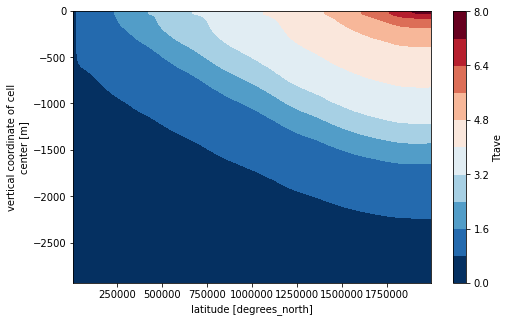

In [37]:
dsave.Ttave.mean(['time','XC']).plot.contourf(figsize=(8,5), levels=np.linspace(0,8,11),
                                             cmap='RdBu_r')

In [4]:
ds = open_mdsdataset(op.join(bdir,'20km_mp12-15_mu18-124_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                     grid_dir=op.join(pdir,'20km_grid'), iters=range(ts+df,te+df,df),
                     prefix=['MOMtave','FeTtave','BIOtave',
#                              'KPPboundary'
                            ], delta_t=dt
                    ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
ds

<xarray.Dataset>
Dimensions:   (XC: 50, XG: 50, YC: 40, YG: 41, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
    iter      (time) int64 dask.array<shape=(1800,), chunksize=(1,)>
  * time      (time) float64 7.372e+09 7.372e+09 ... 7.527e+09 7.527e+09
  * XC        (XC) >f4 10000.0 30000.0 50000.0 ... 950000.0 970000.0 990000.0
  * YC        (YC) >f4 610000.0 630000.0 650000.0 ... 1370000.0 1390000.0
  * XG        (XG) >f4 0.0 20000.0 40000.0 ... 940000.0 960000.0 980000.0
  * YG        (YG) >f4 600000.0 620000.0 640000.0 ... 1380000.0 1400000.0
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA        (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    dxG       (YG, XC) >f4 dask.array<shape=(41, 50)

In [5]:
grid = Grid(ds, periodic=['X'])

In [6]:
# P1 = ds.TRAC22
# P2 = ds.TRAC23
# Z1 = ds.TRAC08
# Z2 = ds.TRAC12
PP = ds.PP
# Fe1D = ds.TRAC03

In [7]:
PPC_intgH = grid.cumsum(PP*106*12 * ds.drF, 'Z', boundary='fill')[:,-1]
PPC_intgH.coords['days'] = ('time',np.tile(range(360),dy))
PPC_intgH.groupby('days').mean('time').to_dataset(name='PPC_intgH').to_netcdf(op.join(bdir,'PPCH_20km.nc'))
PPC_intgH

<xarray.DataArray 'concatenate-d9e792c9d3dfe3bc582306099e1e7203' (time: 1800, YC: 40, XC: 50)>
dask.array<shape=(1800, 40, 50), dtype=float32, chunksize=(1, 40, 50)>
Coordinates:
  * time     (time) float64 7.372e+09 7.372e+09 ... 7.527e+09 7.527e+09
    Zl       >f4 -2882.0
  * YC       (YC) >f4 610000.0 630000.0 650000.0 ... 1370000.0 1390000.0
  * XC       (XC) >f4 10000.0 30000.0 50000.0 ... 950000.0 970000.0 990000.0
    days     (time) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359

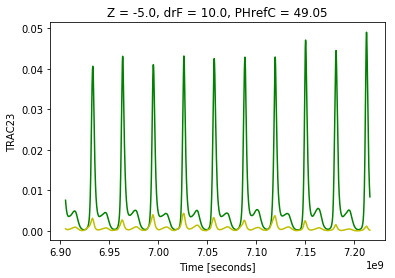

In [11]:
fig,ax = plt.subplots()
P1[:,0].sel(YC=slice(6e5,14e5)).mean(['YC','XC']).plot(ax=ax, color='g')
P2[:,0].sel(YC=slice(6e5,14e5)).mean(['YC','XC']).plot(ax=ax, color='y')

In [13]:
P1.coords['days'] = ('time',np.tile(range(360),dy))
P2.coords['days'] = ('time',np.tile(range(360),dy))
# Z1.coords['days'] = ('time',np.tile(range(360),dy))
# Z2.coords['days'] = ('time',np.tile(range(360),dy))
PP.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    P1day = P1.groupby('days').mean(['time']).compute()
    P2day = P2.groupby('days').mean(['time']).compute()
#     Z1day = Z1.groupby('days').mean(['time']).compute()
#     Z2day = Z2.groupby('days').mean(['time']).compute()
    PPday = PP.groupby('days').mean(['time']).compute()

[########################################] | 100% Completed |  1min  4.5s
[########################################] | 100% Completed | 19.1s
[########################################] | 100% Completed | 11.9s


In [43]:
dsave = (P1day+P2day).to_dataset(name='Ptot_d')
dsave['dz'] = ds.drF
dsave['Z'] = ds.Zl
dsave.to_netcdf(op.join(bdir,'Ptot_600-1400km_20kmDailyClim.nc'))
dsave

<xarray.Dataset>
Dimensions:  (XC: 50, YC: 40, Z: 40, Zl: 40, days: 360)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...
    Z        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 400000000.0 400000000.0 400000000.0 400000000.0 ...
    Depth    (YC, XC) >f4 2985.0 2985.0 2985.0 2985.0 2985.0 2985.0 2985.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    hFacC    (Z, YC, XC) >f4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Data variables:
    Ptot_d   (days, Z, YC, XC) float32 0.008913011 0.0090893805 0.009138887 ...
    dz       (Z) >f4 dask.array<s

In [14]:
nz = 8
with ProgressBar():
    P1Cday = (grid.cumsum(P1day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P2Cday = (grid.cumsum(P2day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z1Cday = (grid.cumsum(Z1day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z2Cday = (grid.cumsum(Z2day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
PPCday = PPday*106.*12.

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.5s


In [22]:
PtotCday = (P1Cday+P2Cday).sel(YC=slice(6e5,14e5))
# with ProgressBar():
#     Ptot = (P1Cday+P2Cday).sel(YC=slice(6e5,14e5)).compute()
# Ptot
PtotCday

<xarray.DataArray (days: 360, YC: 40, XC: 50)>
array([[[16.016954, 16.212687, ..., 16.036097, 15.845962],
        [15.85902 , 15.837416, ..., 16.04643 , 15.952326],
        ...,
        [12.320474, 12.480963, ..., 10.296212, 11.415441],
        [11.929618, 11.96633 , ...,  9.803288, 11.11405 ]],

       [[15.717503, 15.843398, ..., 15.94671 , 15.691377],
        [15.685706, 15.569438, ..., 15.84732 , 15.882317],
        ...,
        [11.008647, 12.009593, ...,  8.55138 ,  9.707553],
        [10.963836, 11.70169 , ...,  8.304744,  9.591681]],

       ...,

       [[16.539942, 16.7649  , ..., 16.309824, 16.445599],
        [16.18155 , 16.241451, ..., 16.338682, 16.229113],
        ...,
        [14.247581, 14.125259, ..., 13.598167, 13.858391],
        [12.98656 , 12.956106, ..., 13.005154, 13.092364]],

       [[16.173521, 16.259272, ..., 16.12889 , 16.048891],
        [15.944923, 15.906095, ..., 16.10634 , 16.0685  ],
        ...,
        [13.791691, 14.091018, ..., 12.65589 , 13.308043

In [16]:
dsave = (P1day+P2day).to_dataset(name='Ptot_d')
dsave['wpFep_d'] = wpFep_d
dsave.to_netcdf(op.join(ddir,'Ptot-wpFep_600-1400km_20kmDailyClim.nc'))
dsave

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


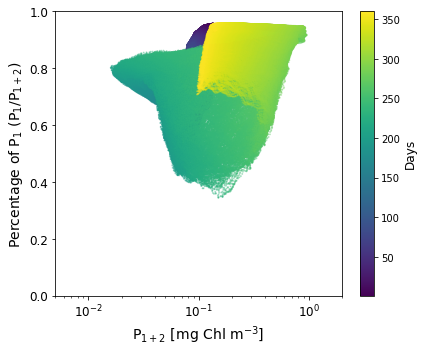

In [204]:
colors = Ptot.days.data[:,np.newaxis,np.newaxis]*np.ones((40,50))+1.

fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
for i in range(360):
    if i == 0:
        im = ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
                       c=colors[i], alpha=360./(360.+3*i),
                       s=1., vmin=1., vmax=360., rasterized=True
                       )
    else:
        ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
                  c=colors[i], alpha=360./(360.+3*i),
                  s=1., vmin=1., vmax=360., rasterized=True
                  )
ax.set_xscale('log')
ax.set_xlim([5e-3,2e0])
ax.set_ylim([0.,1.])
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"Days", fontsize=12)
ax.set_xlabel(r"P$_{1+2}$ [mg Chl m$^{-3}$]", fontsize=14)
ax.set_ylabel(r"Percentage of P$_1$ (P$_1$/P$_{1+2}$)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(op.join(ddir,'Figures/P1vsP_20km.pdf'))

In [38]:
viirsdir = '/swot/SUM05/takaya/VIIRS/monthly/'
cbpm = xr.open_dataset(op.join(viirsdir,'CbPM-VIIRS-monthly_40-70S.nc')).cbpm
cbpm_ker = cbpm.sel(lon=slice(100,150))
c = xr.open_dataset(op.join(viirsdir,'Carbon-VIIRS-monthly_40-70S.nc')).carbon
c_ker = c.sel(lon=slice(100,150))
print(c_ker.attrs, cbpm_ker.attrs)

# c_ker.coords['iMONTH'] = ('iTIME', months)

with ProgressBar():
    cbpm_ker_mon = cbpm_ker.groupby('months').mean('iTIME').compute()
    c_ker_mon = c_ker.groupby('months').mean('iTIME').compute()
    
del cbpm, c
c_ker_mon

OrderedDict([('units', 'mg C m-3')]) OrderedDict([('units', 'mg C m-2 d-1')])


<xarray.DataArray 'carbon' (months: 12, lat: 180, lon: 300)>
array([[[15.112427, 14.852038, ..., 12.71562 , 12.428508],
        [15.321337, 15.516882, ..., 12.616169, 12.885255],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.136292, 15.66229 , ..., 11.292799, 11.285312],
        [15.517662, 15.276718, ..., 11.046855, 10.657256],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[13.21138 , 12.787419, ..., 17.215484, 17.393421],
        [12.773817, 13.044801, ..., 17.452012, 16.252701],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.93975 , 16.80695 , ..., 16.324605, 16.893064],
        [16.262466, 16.190208, ..., 16.751794, 16.669233],
        ...,
        [      nan,       nan, ...,       

In [33]:
with ProgressBar():
    cbpm_ker_std = cbpm_ker.groupby('months').std(['iTIME','lat','lon']).compute()
    c_ker_std = c_ker.groupby('months').std(['iTIME','lat','lon']).compute()
cbpm_ker_std

<xarray.DataArray 'cbpm' (months: 12)>
array([124.339069, 111.757269,  98.648962,  69.999431,  43.799063,  39.863988,
        33.011609,  35.086253,  43.425521,  62.720001, 117.972112, 138.191744])
Coordinates:
  * months   (months) int64 0 1 2 3 4 5 6 7 8 9 10 11

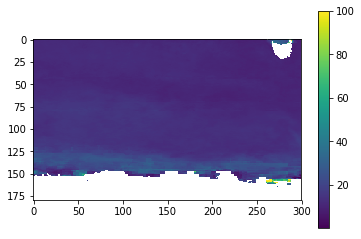

In [15]:
plt.imshow(c_ker_mon.mean('months'), vmax=1e2)
plt.colorbar()

In [12]:
cafedir = '/swot/SUM05/takaya/CAFE/'
decaf = loadmat(op.join(cafedir,'CAFE'), appendmat=True)
cafe = decaf['CAFE']
lat = decaf['Lat1']
lon = decaf['Lon1']
ppcb = np.zeros((12,180,360))
for i in range(12):
    ppcb[i] = cafe[:,:,i]
    
decaf = xr.DataArray(ppcb, dims=['month','lat','lon'],
                 coords={'month':range(1,13),'lat':lat[:,0],'lon':lon[0,:]}
                 ).to_dataset(name='carbon')
decaf_SO = decaf.sel(lat=slice(-45,-65),lon=slice(50,180))
del decaf, ppcb
decaf_SO

<xarray.Dataset>
Dimensions:  (lat: 20, lon: 130, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 ...
  * lon      (lon) float64 50.5 51.5 52.5 53.5 54.5 55.5 56.5 57.5 58.5 59.5 ...
Data variables:
    carbon   (month, lat, lon) float64 635.4 618.2 587.5 501.0 514.8 526.0 ...

In [ ]:
# P1_intg = (P1*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P2_intg = (P2*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P1_intg

In [ ]:
# sosedir = '/swot/SUM05/takaya/SOSE'
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_Phyto.nc'))
# P_sose = sose.phyto
# P_sose.attrs = sose.phyto.attrs

# gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))

# P_sose.coords['iTIME'] = ('iTIME',range(609))
# P_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# P_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# P_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# P_kersurf = (P_sose*P_sose.iDEPTH)[:,:12].sum('iDEPTH').sel(iLON=slice(100,140)) * 1e-2
# del P_sose
# DinY = np.tile(range(121),5)
# P_kersurf = P_kersurf[:-4]
# P_kersurf.coords['DinY'] = ('iTIME',DinY)
# P_kersurf = P_kersurf.groupby('DinY').mean('iTIME')

# P_kersurf

In [ ]:
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_NPP.nc'))
# PP_sose = sose.NPP
# print(sose.NPP.attrs)
# PP_sose.attrs = sose.NPP.attrs

# gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))

# PP_sose.coords['iTIME'] = ('iTIME',range(609))
# PP_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# PP_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# PP_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# PP_kersurf = (PP_sose*PP_sose.iDEPTH).sel(iLON=slice(100,140)).sum('iDEPTH')
# del PP_sose
# DinY = np.tile(range(121),5)
# PP_kersurf = PP_kersurf[:-4]
# PP_kersurf.coords['DinY'] = ('iTIME',DinY)
# PP_kersurf = PP_kersurf.groupby('DinY').mean('iTIME')

In [14]:
sosedir = '/swot/SUM05/takaya/SOSE'
dsSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/Biomass-Productivity_3D_Kerguelen.nc'))
P_kersurf = dsSOSE.Phyto_100m
PP_kersurf = dsSOSE.Prod_intg

In [9]:
PPintg = (PPCday*ds.hFacC*ds.drF).sum(dim='Z')
PPintg

<xarray.DataArray (days: 360, YC: 100, XC: 50)>
dask.array<shape=(360, 100, 50), dtype=float32, chunksize=(360, 100, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    rA       (YC, XC) >f4 400000000.0 400000000.0 400000000.0 400000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [10]:
PPintg.sel(YC=slice(6e5,14e5)).mean(['XC','YC']).sum('days').values

array(0.34280667, dtype=float32)

In [16]:
PintgC = ((P1+P2)*106*12*ds.hFacC*ds.drF).sum(dim='Z')
r = np.log(PintgC[1:]/PintgC[:-1].data) * PintgC.time.diff('time',1)**-1
tnew = .5*(ds.time.data[1:]+ds.time.data[:-1])
func = pchip(tnew, r, axis=0)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:253: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:121: RuntimeWarning: invalid value encountered in greater
  mask2 = (np.sign(m0) != np.sign(m1)) & (np.abs(d) > 3.*np.abs(m0))


In [17]:
r = xr.DataArray(func(ds.time.data), dims=P1[:,0].dims, coords=P1[:,0].coords)
r*86400

<xarray.DataArray (time: 3600, YC: 100, XC: 50)>
array([[[      nan,       nan, ...,       nan,       nan],
        [ 0.039107,  0.033384, ...,  0.035007,  0.045231],
        ...,
        [-0.007997, -0.01246 , ..., -0.000565, -0.002865],
        [-0.005903, -0.006249, ..., -0.006629, -0.005842]],

       [[      nan,       nan, ...,       nan,       nan],
        [ 0.038328,  0.032059, ...,  0.036025,  0.044637],
        ...,
        [-0.008898, -0.011889, ..., -0.000292, -0.002844],
        [-0.004655, -0.004643, ..., -0.005513, -0.005054]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [ 0.090994,  0.06882 , ...,  0.01347 ,  0.038987],
        ...,
        [-0.010407, -0.020683, ..., -0.005312, -0.007419],
        [-0.012684, -0.016189, ..., -0.017378, -0.013888]],

       [[      nan,       nan, ...,       nan,       nan],
        [ 0.08048 ,  0.068524, ...,  0.011564,  0.034911],
        ...,
        [-0.011148, -0.021566, ..., -0.0052  , -0.0074

In [77]:
print(ds.ADVrTr03.attrs)
print(ds.DFrITr03.attrs)

OrderedDict([('standard_name', 'ADVrTr03'), ('long_name', 'Vertical   Advective Flux of FeT'), ('units', 'mM/m^3 .m^3/s')])
OrderedDict([('standard_name', 'DFrITr03'), ('long_name', 'Vertical Diffusive Flux of FeT (Implicit part)'), ('units', 'mM/m^3 .m^3/s')])


In [18]:
# l = mu - r
r.coords['days'] = ('time',np.tile(range(360),dy))
# mu.coords['days'] = ('time',np.tile(range(360),dy))
# l.coords['days'] = ('time',np.tile(range(360),dy))
# FadvW_d = ds.ADVrTr03
# dfib_d = ds.DFrITr03
# FadvW_d.coords['days'] = ('time',np.tile(range(360),dy))
# dfib_d.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    rday = r.groupby('days').mean('time').compute()
#     FadvW_d = FadvW_d[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     dfib_d = dfib_d[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     muday = mu.groupby('days').mean('time')
#     lday = l.groupby('days').mean('time')

[########################################] | 100% Completed |  0.1s


In [13]:
# MXLD = xr.open_dataset(op.join(ddir,'MXLD_20km.nc')).MXLD
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD = hbl99.groupby('day').mean(['time'])

In [14]:
zz = xr.DataArray(np.abs(ds.Zl).data[np.newaxis,:,np.newaxis]*np.ones((24,100))[:,np.newaxis,:],
                 dims=['day','Zl','YC'])
nMXLD = np.argmin(np.abs(zz-MXLD[::15]), axis=1)
nXLD100_15 = nMXLD.data.copy()
nXLD100_15[nXLD100_15<8] = 8
nXLD100_15 = xr.DataArray(nXLD100_15, dims=nMXLD.dims, coords={'day':range(24),'YC':MXLD.YC.data})
nXLD100_15

<xarray.DataArray (day: 24, YC: 100)>
array([[ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8],
       ...,
       [ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8],
       [ 8, 19, 18, ...,  8,  8,  8]])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
  * YC       (YC) float32 10000.0 30000.0 50000.0 ... 1970000.0 1990000.0

In [40]:
with ProgressBar():
    F_XLD = (wpFep+dfz_cons.data[::15]).sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','XC']).isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))
                                                                                                       ).mean('YC').compute()
    # adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
#     wpFep_c_XLD = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','XC']).isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))
#                                                                                        ).mean('YC').compute()
# w2_sqrt
F_XLD

[########################################] | 100% Completed | 30.3s


<xarray.DataArray (day: 24)>
array([1.274416e-10, 1.364420e-10, 1.107585e-10, 1.099385e-10, 1.014474e-10,
       1.000708e-10, 8.436112e-11, 1.750060e-10, 2.899000e-10, 2.641791e-10,
       3.332335e-10, 2.739189e-10, 2.881171e-10, 4.840759e-10, 3.614086e-10,
       4.526217e-10, 4.353209e-10, 3.298850e-10, 2.813428e-10, 2.360371e-10,
       1.756581e-10, 1.431860e-10, 2.889782e-10, 1.673417e-10], dtype=float32)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [42]:
F_XLD.to_dataset(name='Ftot').to_netcdf(op.join(bdir,'Ftot_XLD100_20km.nc'))

In [ ]:
# diff = ds.DFrITr03
# diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA)
# advW = ds.ADVrTr03
# # advV = ds.ADVyTr03
# adv_z = grid.diff(advW,'Z',boundary='fill')/(ds.rA)
# # advy = grid.diff(advV, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')

# diff_z.coords['days'] = ('time',np.tile(range(360),dy))
# adv_z.coords['days'] = ('time',np.tile(range(360),dy))

# with ProgressBar():
#     dff_z_100 = diff_z[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     adv_z_100 = adv_z[:,7].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    
# adv_z_100

In [ ]:
# FadvW_zave = (FadvW_d*ds.drC[4:8].data[np.newaxis,:,np.newaxis,np.newaxis]).sum('Zl')*np.abs(ds.Z[3].data - ds.Z[8].data)**-1
# dfib_zave = (dfib_d*ds.drC[:5].data[np.newaxis,:,np.newaxis,np.newaxis]).sum('Zl')*np.abs(ds.Z[5].data)**-1
# FadvW_zave

(-5e-10, 5e-10)

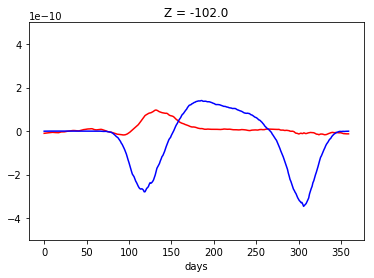

In [229]:
fig, ax = plt.subplots()
# ax2 = ax.twinx()
adv_z_100.plot(ax=ax, color='r')
dff_z_100.plot(ax=ax, color='b')
ax.set_ylim([-5.e-10,5.e-10])

In [9]:
dsnap = open_mdsdataset(op.join(bdir,'20km_mp12-15_mu18-124_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts,te,720),
                       prefix=['W','PTRACER03','PTRACER22','PTRACER23'], delta_t=dt
                       ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
dsmon = open_mdsdataset(op.join(bdir,'20km_mp12-15_mu18-124_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                       grid_dir=op.join(pdir,'20km_grid'), iters=range(ts+1440,te+1440,1440),
                       prefix=['wVeltave','PTRtave03','PTRtave22','PTRtave23'], delta_t=dt
                       ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
grid = Grid(dsnap, periodic=['X'])

AttributeError: 'Dataset' object has no attribute 'PTRtave22'

In [10]:
wsp = dsnap.W
Fesp = dsnap.PTRACER03
Psp = dsnap.PTRACER22 + dsnap.PTRACER23 
# POCsp = dsnap.PTRACER26
wm = dsmon.wVeltave
Fem = dsmon.PTRtave03
Pm = dsmon.PTRtave22 + dsmon.PTRtave23 
# POCm = dsmon.PTRtave26
print(wsp,wm)

<xarray.DataArray 'W' (time: 120, Zl: 40, YC: 40, XC: 50)>
dask.array<shape=(120, 40, 40, 50), dtype=float32, chunksize=(1, 40, 40, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 ... 950000.0 970000.0 990000.0
  * YC       (YC) >f4 610000.0 630000.0 650000.0 ... 1370000.0 1390000.0
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA       (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(40, 50), chunksize=(40, 50)>
    iter     (time) int64 dask.array<shape=(120,), chunksize=(1,)>
  * time     (time) float64 7.372e+09 7.373e+09 ... 7.525e+09 7.526e+09
Attributes:
    standard_name:  sea_water_z_velocity
    long_name:      Vertical Component of Velocity
    units:          m s-1 <xarray.DataArray 'wVeltave' (time: 60, Zl: 40, YC: 40, XC: 50)>
dask.array<shape=(60, 40, 40, 50), dtype=float32, chunksize=(1, 40, 40, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 ... 

In [11]:
# diff = ds.DFrITr03
# advW = ds.ADVrTr03
# dfz_cons = diff/(ds.rA)
# adz_cons = advW/(ds.rA)
# dfz_cons.coords['day'] = ('time',np.tile(range(360),dy))
# adz_cons.coords['day'] = ('time',np.tile(range(360),dy))
wsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
Fesp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
Psp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
wm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
Fem.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
Pm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
# POCsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
# POCm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
wp = wsp.groupby('seas') - wm.groupby('seas').mean(['time','XC'])
Fep = Fesp.groupby('seas') - Fem.groupby('seas').mean(['time','XC'])
Pp = Psp.groupby('seas') - Pm.groupby('seas').mean(['time','XC'])
# POCp = POCsp.groupby('seas') - POCm.groupby('seas').mean(['time','XC'])

In [19]:
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
wpFep.coords['day'] = ('time',np.tile(range(24),dy))
wpPp = wp*grid.interp(Pp,'Z',boundary='fill')
wpPp.coords['day'] = ('time',np.tile(range(24),dy))
# wpPOCp = wp*grid.interp(POCp,'Z',boundary='fill')
# wpPOCp.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
#     wpPOCp_d = wpPOCp.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
#     dfz_c = dfz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
#     adz_c = adz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    wpFep_d = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    wpPp_d = wpPp.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','XC']).compute()

[########################################] | 100% Completed |  2.9s
[########################################] | 100% Completed |  3.2s


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


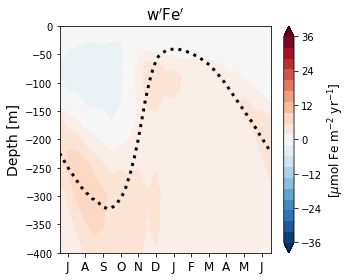

In [14]:
fig, ax = plt.subplots(figsize=(5,4))
fig.set_tight_layout(True)
im1 = ax.contourf(range(0,350,15), wpFep_d.Zl, wpFep_d.T.roll(day=-12)*360*86400e3, 
                 levels=np.linspace(-36,36,30), 
                 cmap='RdBu_r', extend='both')
im2 = ax.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.T.roll(day=-13)*360*86400e3, 
                 levels=np.linspace(-36,36,30), 
                 cmap='RdBu_r', extend='both')
ax.plot(range(360), -MXLD.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')

for c in im1.collections:
    c.set_rasterized(True)
for c in im2.collections:
    c.set_rasterized(True)

ax.set_ylim([-4e2,0])
ax.set_title(r"w$'$Fe$'$", fontsize=15)

ax.set_xticks(np.linspace(14,344,12))
ax.set_xticklabels(np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),-6), fontsize=12)
ax.set_ylabel(r"Depth [m]", fontsize=14)
cbar = fig.colorbar(im, ax=ax, ticks=[-36,-24,-12,0,12,24,36])
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/VerticalFeflux_20km.pdf'))

In [30]:
dsave = wpFep_d.to_dataset(name='wpFep')
dsave['Fdiff'] = xr.DataArray(dfz_c[::15].data, dims=wpFep_d.dims, coords=wpFep_d.coords)
# dsave['wMLIPOCp'] = wMLIPOCp
dsave.to_netcdf(op.join(bdir,'VertFeFlux_20km.nc'))
dsave

<xarray.Dataset>
Dimensions:  (Zl: 40, day: 24)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    wpFep    (day, Zl) float32 -2.5462723e-15 1.9352127e-13 3.8804555e-13 ...
    Fdiff    (day, Zl) float32 0.0 -5.079552e-13 3.7171165e-12 9.3919724e-12 ...

In [20]:
dsave = (P1day+P2day).to_dataset(name='Ptot_d')
dsave['wpFep_d'] = wpFep_d
dsave.to_netcdf(op.join(bdir,'Ptot-wpFep_600-1400km_20kmDailyClim.nc'))
dsave

<xarray.Dataset>
Dimensions:  (XC: 50, YC: 40, Z: 40, Zl: 40, day: 24, days: 360)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 610000.0 630000.0 650000.0 670000.0 690000.0 710000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 400000000.0 400000000.0 400000000.0 400000000.0 ...
    Depth    (YC, XC) >f4 2985.0 2985.0 2985.0 2985.0 2985.0 2985.0 2985.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    hFacC    (Z, YC, XC) >f4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    Ptot_d   (days, Z, Y

In [71]:
Fe.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    Fe_c = Fe.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
Fe_c

[########################################] | 100% Completed |  8.3s


<xarray.DataArray 'TRAC03' (day: 360, Z: 40)>
array([[2.812956e-06, 2.810056e-06, 2.807237e-06, ..., 4.169623e-04,
        4.183770e-04, 4.189889e-04],
       [2.885802e-06, 2.882808e-06, 2.879633e-06, ..., 4.169645e-04,
        4.183800e-04, 4.189909e-04],
       [2.959622e-06, 2.956552e-06, 2.953074e-06, ..., 4.169671e-04,
        4.183832e-04, 4.189933e-04],
       ...,
       [2.587376e-06, 2.584803e-06, 2.583307e-06, ..., 4.168503e-04,
        4.182576e-04, 4.188504e-04],
       [2.655481e-06, 2.652841e-06, 2.651004e-06, ..., 4.168522e-04,
        4.182599e-04, 4.188521e-04],
       [2.725713e-06, 2.722985e-06, 2.720787e-06, ..., 4.168545e-04,
        4.182625e-04, 4.188541e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 

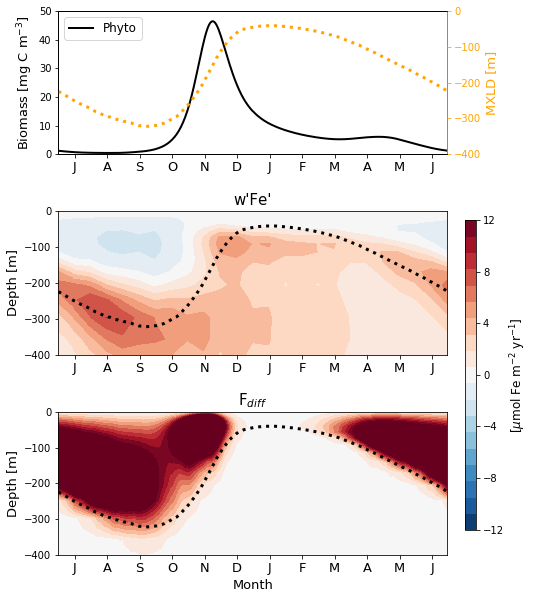

In [29]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3,ax9) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
# fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
# ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"F$_{diff}$")
im3 = ax3.contourf(range(0,346,15), wpFep_d.Zl, wpFep_d.T.roll(day=-12)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
ax3.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.T.roll(day=-13)*(360*86400)*1e3, 
            levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), dfz_c.Zl, dfz_c.T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r', extend='both')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
               ls=':', lw=3, color='orange')


ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([0.,359])
ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax3.set_ylim([-400,0])
ax5.set_ylim([-400,0])
ax9.set_ylim([-400,0])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

ax5.spines["right"].set_edgecolor(im5.get_color())
ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-12,-8,-4,0,4,8,12])
cbar.set_label(r'[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=12)
ax9.set_title(r'F$_{diff}$', fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe'", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_woutflux_wHopfMellor_20km.pdf'))

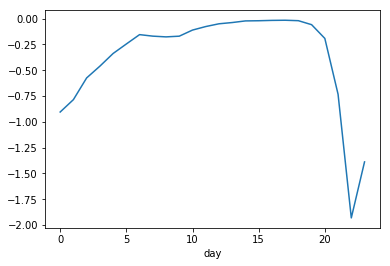

In [22]:
# dfz_c_XLD = dfz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
# adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
wpFep_c_XLD = wpFep_d.isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))).mean('YC')
wpPp_c_XLD = wpPp_d.isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))).mean('YC')
(wpPp_c_XLD*86400*360).plot()

In [23]:
wpPp_c_XLD.to_dataset(name='wpPp_XLD').to_netcdf(op.join(bdir,'wpPp_XLD_20km.nc'))

In [24]:
dsave = dfz_c_XLD.to_dataset(name='Fdiff_z')
dsave['Fadv_z'] = adz_c_XLD
dsave['wpFep'] = wpFep_c_XLD
dsave.to_netcdf(op.join(bdir,'VerticalIronFluxes_XLD_20km.nc'))

(0.0, 5e-10)

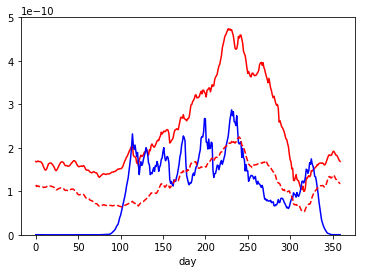

In [25]:
fig, ax = plt.subplots()
# ax2 = ax.twinx()
# (adz_c_100 * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1).plot(ax=ax, color='r')
# (dfz_c_100 * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1).plot(ax=ax, color='b')
adz_c_XLD.plot(ax=ax, color='r')
dfz_c_XLD.plot(ax=ax, color='b')
wpFep_c_XLD.plot(ax=ax, color='r', ls='--')
ax.set_ylim([0.,5e-10])

In [57]:
ds.Z[:18]

<xarray.DataArray 'Z' (Z: 18)>
array([  -5. ,  -15. ,  -25. ,  -36. ,  -49. ,  -64. ,  -81.5, -102. , -126. ,
       -154. , -187. , -226. , -272. , -327. , -393. , -471.5, -565. , -667.5],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 dask.array<shape=(18,), chunksize=(18,)>
    PHrefC   (Z) >f4 dask.array<shape=(18,), chunksize=(18,)>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down
    axis:           Z

In [73]:
n500 = 17
diff_M = dfz_c[:,:n500].max()
diff_M

<xarray.DataArray ()>
array(2.778485e-09)

In [31]:
dsmom = open_mdsdataset(op.join(bdir,'20kmMLI_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                     grid_dir=op.join(pdir,'20km_grid'), iters=range(ts,te,720),
                     prefix=['MOMsnap',
                            ], delta_t=dt
                    )
dsmom

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 240)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask

In [75]:
wpbp = xr.open_dataset(op.join(pdir,'APEconversion_20km.nc')).wpbp
# wpbp.coords['days'] = ('time', np.tile(range(24),23))
with ProgressBar():
    wpbp_d = wpbp.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
wpbp_d

<xarray.DataArray 'wpbp' (days: 24, Zl: 40)>
array([[-4.879377e-10,  4.319233e-10,  7.785458e-10, ...,  3.867451e-10,
         1.908764e-10,  9.985195e-11],
       [-6.167477e-10,  3.777636e-10,  6.748421e-10, ...,  3.720008e-10,
         1.818765e-10,  9.668205e-11],
       [-1.562463e-09,  4.244594e-10,  7.717481e-10, ...,  3.831086e-10,
         1.881052e-10,  1.028213e-10],
       ...,
       [ 2.794379e-10,  9.276243e-10,  1.747867e-09, ...,  3.652191e-10,
         1.806369e-10,  9.523243e-11],
       [-2.077086e-10,  7.304122e-10,  1.359712e-09, ...,  3.674465e-10,
         1.868114e-10,  1.050825e-10],
       [-7.391135e-10,  5.253695e-10,  9.549396e-10, ...,  3.486413e-10,
         1.701086e-10,  8.876732e-11]], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


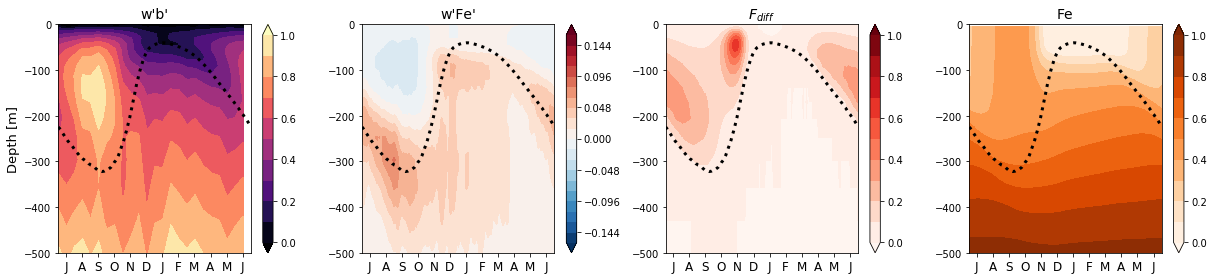

In [80]:
nys, nyn = (6e5,14e5)
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(17,4))
fig.set_tight_layout(True)
im1 = ax1.contourf(np.linspace(0,345,24), wpbp_d.Zl, wpbp_d.T.roll(days=-12)/wpbp_d[:,:n500].max(), 
                  levels=np.linspace(0.,1.,11), extend='both', cmap='magma')
im2 = ax2.contourf(range(360), wpFep_d.Zl, (wpFep_d.mean('YC')/diff_M).T.roll(day=-180), 
                  levels=np.linspace(-.16,.16,21), cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), dfz_c.Zl, (dfz_c.mean('YC')/diff_M).T.roll(day=-180), 
                  levels=np.linspace(0.,1.,11), cmap='Reds', extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
im4 = ax4.contourf(range(360), Fe_c.Z, Fe_c.T.roll(day=-180)/Fe_c[:,:n500].max(), 
                  levels=np.linspace(0,1,11), extend='both', cmap='Oranges')
ax1.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-5e2,0])
ax1.set_xlim([0.,359.])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax4.set_ylim([-5e2,0])
ax1.set_title(r"w'b'", fontsize=14)
ax2.set_title(r"w'Fe'", fontsize=14)
ax3.set_title(r"$F_{diff}$", fontsize=14)
ax4.set_title(r"Fe", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)
# cbar.set_label(r"$F_z/F_{diff}^{max}$", fontsize=12)
plt.savefig(op.join(pdir,'Figures/wb-IronFlux-P_dailyclimatology_20km.pdf'))

In [77]:
b = grid.diff(ds.PHIHYD,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
dbdz = grid.diff(b,'Z',boundary='fill')/grid.diff(ds.Zl,'Z',boundary='fill')
dFedz = grid.diff(Fe,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
dbdz.coords['days'] = ('time',np.tile(range(360),dy))
dFedz.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    dbdz_d = dbdz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    dFedz_d = dFedz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
dFedz_d

[########################################] | 100% Completed |  2min 51.4s
[########################################] | 100% Completed | 45.1s


<xarray.DataArray (days: 360, Zl: 40)>
array([[-5.625911e-07,  2.899856e-10,  2.818945e-10, ..., -2.006391e-08,
        -1.373562e-08, -5.939975e-09],
       [-5.771604e-07,  2.993965e-10,  3.175033e-10, ..., -2.006660e-08,
        -1.374201e-08, -5.931806e-09],
       [-5.919244e-07,  3.069422e-10,  3.477842e-10, ..., -2.006960e-08,
        -1.374778e-08, -5.923371e-09],
       ...,
       [-5.174753e-07,  2.573043e-10,  1.495945e-10, ..., -2.001456e-08,
        -1.366304e-08, -5.755188e-09],
       [-5.310962e-07,  2.640682e-10,  1.835947e-10, ..., -2.001571e-08,
        -1.366669e-08, -5.749577e-09],
       [-5.451427e-07,  2.728373e-10,  2.197867e-10, ..., -2.001667e-08,
        -1.366989e-08, -5.744172e-09]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [78]:
wp.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    Ptot_midd = (P1day + P2day).sel(YC=slice(6e5,14e5)).mean(['YC','XC']).compute()
    w2_sqrt = np.sqrt((wp.sel(YC=slice(6e5,14e5))**2).groupby('day').mean(['time','YC','XC'])).compute()
Ptot_midd

[########################################] | 100% Completed | 22.6s


<xarray.DataArray (days: 360, Z: 40)>
array([[8.569641e-03, 8.607515e-03, 8.651493e-03, ..., 1.649274e-10,
        1.655299e-10, 1.703915e-10],
       [8.228675e-03, 8.265245e-03, 8.308003e-03, ..., 1.649269e-10,
        1.655278e-10, 1.703943e-10],
       [7.909128e-03, 7.944450e-03, 7.986002e-03, ..., 1.649264e-10,
        1.655257e-10, 1.703970e-10],
       ...,
       [9.756977e-03, 9.799522e-03, 9.847607e-03, ..., 1.651119e-10,
        1.657439e-10, 1.705546e-10],
       [9.339321e-03, 9.380257e-03, 9.426874e-03, ..., 1.651116e-10,
        1.657418e-10, 1.705575e-10],
       [8.948530e-03, 8.987973e-03, 9.033265e-03, ..., 1.651112e-10,
        1.657396e-10, 1.705604e-10]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


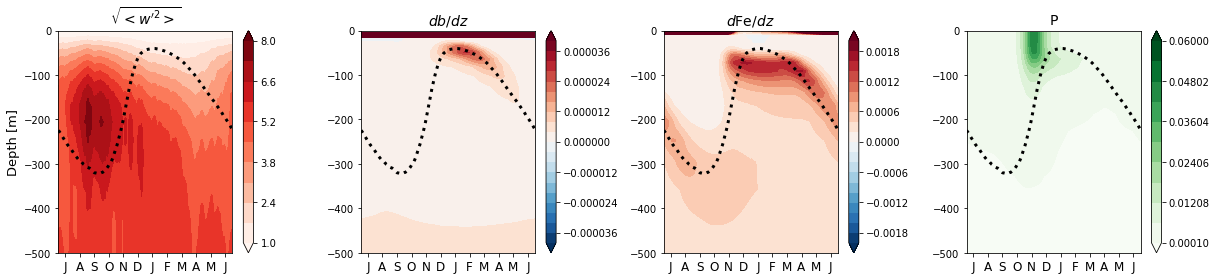

In [79]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(17,4))
fig.set_tight_layout(True)
im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
                  levels=np.linspace(1,8.,11), cmap='Reds', extend='both')
im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
                  levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), dFedz_d.Zl, -dFedz_d.T.roll(days=-180)*1e3, 
                  levels=np.linspace(-.002,.002,21), cmap='RdBu_r', extend='both')
im4 = ax4.contourf(range(360), Ptot_midd.Z, Ptot_midd.T.roll(days=-180), 
                  levels=np.linspace(1e-4,6e-2,11), cmap='Greens', extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax4.set_ylim([-5e2,0])
ax2.set_xlim([0,359])
ax2.set_title(r"$db/dz$", fontsize=14)
ax4.set_title(r"P", fontsize=14)
ax3.set_title(r"$d$Fe$/dz$", fontsize=14)
ax1.set_title(r"$\sqrt{<w'^2>}$", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)
# cbar.set_label(r"$F_z/F_{diff}^{max}$", fontsize=12)
plt.savefig(op.join(pdir,'Figures/w2-Bz-Fez-P_dailyclimatology_20km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


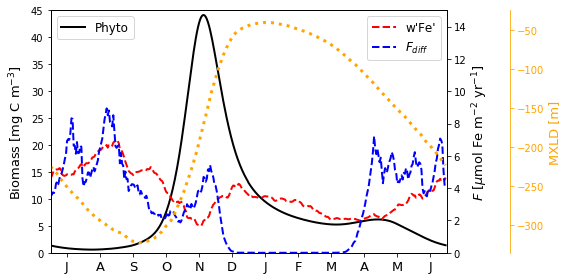

In [74]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
ax2.set_ylim([0,1.5e1])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_Fadv-Fdiff_20km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


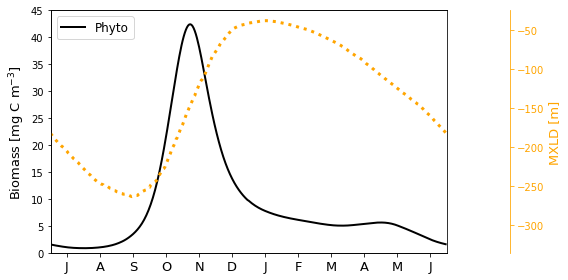

In [57]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
# ax2.plot(range(360), adz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax2.plot(range(360), dfz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
# ax2.set_ylim([0,15e-8])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
# ax2.set_ylabel('$F|_{z=100m}$ [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', fontsize=13)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_20km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


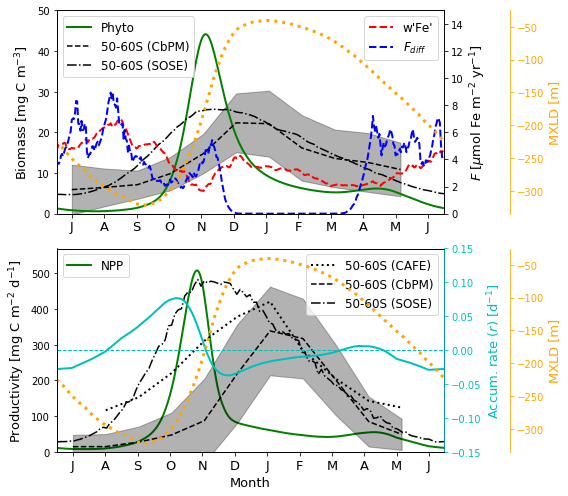

In [37]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax5.spines["right"].set_position(("axes", 1.17))
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'Phyto')
ax1.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax1.fill_between(np.linspace(15,350,12), 
                ((c_ker_mon-c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((c_ker_mon+c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
# ax1.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax1.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
        (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0,1.5e1])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)


ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
        label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax7.fill_between(np.linspace(15,350,12), 
                ((cbpm_ker_mon-cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((cbpm_ker_mon+cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
        (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')
# ax7.plot(range(360), (adz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax7.plot(range(360), (dfz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='c')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='c')
im6, = ax6.plot(range(360), -hbl99_day.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
ax7.legend(loc='upper right', fontsize=12)
ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='c', fontsize=13)
ax4.tick_params('y', colors='c')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax6.tick_params('y', colors='orange')
ax6.set_ylim([-335,-25])
# ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'Productivity [mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWithObs_20km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


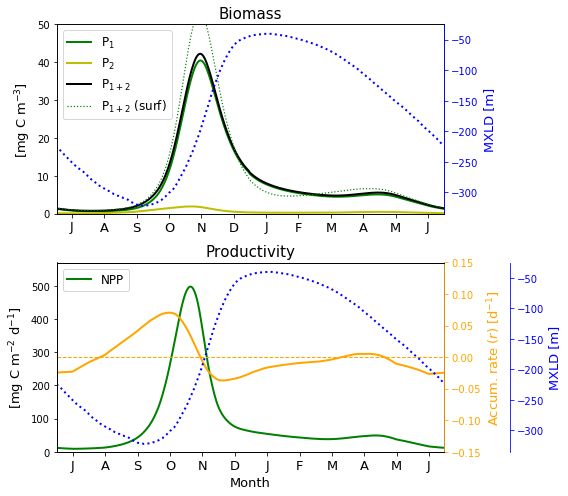

In [32]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'P$_1$')
ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), Ptot.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'P$_{1+2}$')
ax1.plot(range(360), 
         (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
        'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

# ax2.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
#         (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0.,50.])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax5.tick_params('y', colors='b')
ax5.set_ylim([-335,-25])
ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'[mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)


# ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
# ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
#         label=r'50-60S (CbPM)', ls='--', color='k')
# ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
#         (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='orange')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='orange')
im6, = ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
# ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax7.legend(loc='upper right', fontsize=12)
# ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='orange', fontsize=13)
ax4.tick_params('y', colors='orange')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax6.tick_params('y', colors='b')
ax6.set_ylim([-335,-25])
ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'[mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWoutObs_20km.pdf'))

In [62]:
Ptot.mean(['YC','XC']).sum('days').values

array(3189.29345703)

In [70]:
with ProgressBar():
    Pk = xrft.power_spectrum((P1+P2)[:,0], dim=['XC'], detrend='constant').compute()
Pk

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 58.1s


<xarray.DataArray 'rechunk-merge-8785d84aa0a50638c562a97e8cefde96' (time: 4320, YC: 100, freq_XC: 50)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [1.275950e+00, 1.345682e+00, ..., 1.709152e+00, 1.345682e+00],
        ...,
        [6.144149e-01, 4.649278e-01, ..., 2.098586e-01, 4.649278e-01],
        [2.797595e-01, 2.359185e-01, ..., 2.351207e-01, 2.359185e-01]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [5.046055e-01, 4.986948e-01, ..., 5.687512e-01, 4.986948e-01],
        ...,
        [8.565750e-01, 5.492461e-01, ..., 3.302263e-01, 5.492461e-01],
        [2.722564e-01, 2.338545e-01, ..., 2.862984e-01, 2.338545e-01]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [7.350257e-03, 9.773252e-04, ..., 6.908899e-03, 9.773252e-04],
        ...,
        [4.736460e-05, 6.063112e-03, ..., 2.693752e-03, 6.063112e-03],
        [2.376888e-04, 1.451523e-04, ..., 4.309708e-04, 1.45

In [71]:
Pk.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
with ProgressBar():
    Pk_seas = Pk.sel(YC=slice(6e5,14e5)).groupby('seas').mean(['time','YC']).compute()
Pk_seas

<xarray.DataArray 'rechunk-merge-8785d84aa0a50638c562a97e8cefde96' (seas: 4, freq_XC: 50)>
array([[5.620764e-06, 6.036975e-06, 6.595243e-06, 7.885948e-06, 9.730182e-06,
        1.286598e-05, 1.738434e-05, 2.445819e-05, 3.541265e-05, 5.350567e-05,
        8.276107e-05, 1.290614e-04, 2.008929e-04, 3.238013e-04, 5.238507e-04,
        8.205097e-04, 1.257712e-03, 2.075691e-03, 3.229353e-03, 4.937427e-03,
        7.671863e-03, 1.294158e-02, 2.023409e-02, 2.677837e-02, 4.968568e-02,
        6.265206e-14, 4.968568e-02, 2.677837e-02, 2.023409e-02, 1.294158e-02,
        7.671863e-03, 4.937427e-03, 3.229353e-03, 2.075691e-03, 1.257712e-03,
        8.205097e-04, 5.238507e-04, 3.238013e-04, 2.008929e-04, 1.290614e-04,
        8.276107e-05, 5.350567e-05, 3.541265e-05, 2.445819e-05, 1.738434e-05,
        1.286598e-05, 9.730182e-06, 7.885948e-06, 6.595243e-06, 6.036975e-06],
       [8.446546e-06, 8.686975e-06, 9.914042e-06, 1.217096e-05, 1.559818e-05,
        2.137150e-05, 2.996968e-05, 4.469657e-05, 

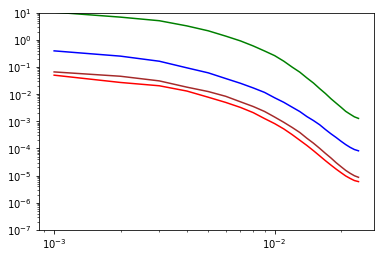

In [258]:
fig, ax = plt.subplots()
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[0,26:], 'r')
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[1,26:], 'brown')
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[2,26:], 'b')
ax.plot(Pk_seas.freq_XC[26:]*1e3, Pk_seas[3,26:], 'g')
ax.set_ylim([1e-7,1e1])
ax.set_xscale('log')
ax.set_yscale('log')

# Eddy iron fluxes

In [41]:
diff = ds.DFrITr03
# with ProgressBar():
#     diff_mn = (diff*ds.rA**-1*(360*86400)*1e3).mean(['time','XC']).compute()
# diff_mn

In [140]:
ds.DFrITr03.attrs

OrderedDict([('standard_name', 'DFrITr03'),
             ('long_name', 'Vertical Diffusive Flux of FeT (Implicit part)'),
             ('units', 'mM/m^3 .m^3/s')])

In [44]:
with ProgressBar():
    ds_clim = ds.mean(['time','XC','XG']).load()

[########################################] | 100% Completed |  6min  9.3s


In [45]:
T_clim = ds_clim.THETA
vb = ds_clim.VVEL
wb = ds_clim.WVEL
Feb = ds_clim.TRAC03
vFeb = ds_clim.VTRAC03
wFeb = ds_clim.WTRAC03
FadvV = ds_clim.ADVyTr03
FadvW = ds_clim.ADVrTr03
kppb = ds_clim.KPPgTr03
dfib = ds_clim.DFrITr03
bgcb = ds_clim.FeTbgc

In [46]:
vbFeb = grid.interp(vb,'Y',boundary='fill')*Feb
wbFeb = grid.interp(wb,'Z',boundary='fill')*Feb
vpFep_b = grid.interp(vFeb,'Y',boundary='fill') - vbFeb
wpFep_b = wFeb - wbFeb

print(vpFep_b, wpFep_b)

<xarray.DataArray (Z: 40, YC: 100)>
array([[ 0.000000e+00,  2.982032e-08,  9.016039e-08, ..., -7.853145e-08,
        -5.195501e-08, -1.796187e-08],
       [ 0.000000e+00,  2.607079e-08,  8.402918e-08, ..., -5.773528e-08,
        -5.171148e-08, -2.205373e-08],
       [ 0.000000e+00,  2.294216e-08,  7.850490e-08, ..., -4.197389e-08,
        -4.133660e-08, -1.723230e-08],
       ...,
       [ 0.000000e+00,  3.384095e-10,  1.457507e-09, ...,  1.431723e-08,
         4.582315e-09,  6.670214e-10],
       [ 0.000000e+00,  7.002574e-10,  2.735397e-09, ...,  1.617433e-08,
         5.200377e-09,  7.774233e-10],
       [ 0.000000e+00,  1.149964e-09,  4.462619e-09, ...,  2.202596e-08,
         7.468042e-09,  1.154032e-09]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z)

In [47]:
fe_intrp = grid.interp(Feb, 'Y', boundary='fill')
temp = (vb * fe_intrp).compute()
temp = vFeb - temp
advpfep_bar = grid.diff(temp*ds.dxG.mean('XC'),'Y',
                        boundary='fill') * ds.rA.mean('XC')**-1

fe_intrp = grid.interp(Feb, 'Z', boundary='fill')
temp = (wb * fe_intrp).compute()
temp = grid.interp(wFeb,'Z',boundary='fill') - temp
adwpfep_bar = grid.diff(temp,'Z',boundary='fill') * ds.drF**-1

advpp_b = -(-adwpfep_bar + advpfep_bar)
advpp_b

<xarray.DataArray (Z: 40, YC: 100)>
dask.array<shape=(40, 100), dtype=float32, chunksize=(40, 99)>
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...

In [48]:
# MLDb = xr.open_dataset(op.join(pdir,'KPPMLD_20km.nc')).mld.mean(['time','XC'])
MXLDb = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20kmMLI.nc')).hbl99.mean(['time'])

NameError: name 'diff_mn' is not defined

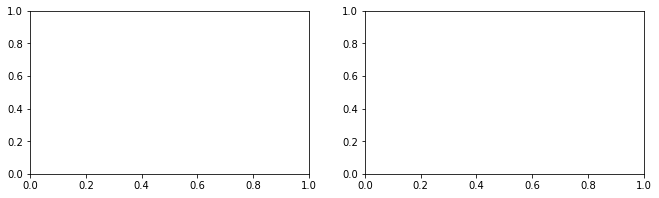

In [128]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,3))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(diff.YC*1e-3, diff.Zl, diff_mn,
                   vmin=1e-1, vmax=1e1, cmap='RdBu_r', norm=colors.LogNorm(),
                   rasterized=True)
ax2.pcolormesh(wpFep_b.YC*1e-3, wpFep_b.Z, wpFep_b*(360*86400)*1e3,
              vmin=1e-1, vmax=1e1, cmap='RdBu_r', norm=colors.LogNorm(),
              rasterized=True)
ax1.set_ylim([-5e2,0.])
ax2.set_ylim([-5e2,0.])
ax1.set_xlabel(r"Y [km]")
ax1.set_ylabel(r"Depth [m]")
ax2.set_xlabel(r"Y [km]")
ax1.set_title(r"$\overline{F}_{diff}$", fontsize=14)
ax2.set_title(r"$\overline{w' Fe'}$", fontsize=14)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]")
plt.savefig(op.join(pdir, 'Figures/VertDiff_wFe_Fe_20km.pdf'))

In [49]:
Fe = ds.TRAC03
with ProgressBar():
    dFedz = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')/grid.diff(Fe.Z,'Z',boundary='fill')).compute()
    dFe = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')).mean('time').compute()

[########################################] | 100% Completed | 27.7s
[########################################] | 100% Completed | 28.6s


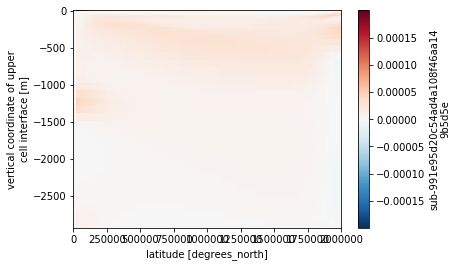

In [154]:
dFe.plot()

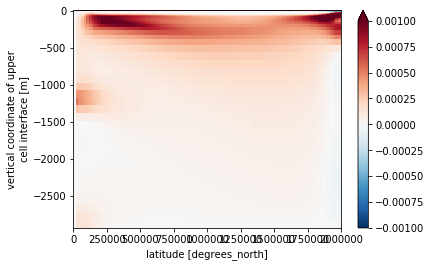

In [76]:
(-dFedz*1e3).mean(['time']).plot(vmax=1e-3)

In [50]:
# nFez_clim = np.argmax(-dFedz[:,:],axis=1)
nFez_clim = np.argmax(-dFedz.mean('time')[1:], axis=0)
# nFe_clim = np.argmax(dFe[1:], axis=0)
# nFez_clim+9

N = nFez_clim.shape
zFe_clim = np.zeros(nFez_clim.shape)
dFe_at_zFe = np.zeros(nFez_clim.shape)
for i in range(N[0]):
    zFe_clim[i] = ds.Zl[int(nFez_clim[i]+1)]
    dFe_at_zFe[i] = dFe[:,i][int(nFez_clim[i]+1)]
#     print(dFe[:,i][int(nFez_clim[i]+1)].values)
#     for j in range(N[1]):
#         zFe_clim[i,j] = ds.Zl[int(nFez_clim[i,j])]
        
zFe_clim = xr.DataArray(zFe_clim, dims=nFez_clim.dims, coords=nFez_clim.coords)
dFe_at_zFe = xr.DataArray(dFe_at_zFe, dims=nFez_clim.dims, coords=nFez_clim.coords)
print(dFe_at_zFe, zFe_clim)

<xarray.DataArray (YC: 100)>
array([0.000000e+00, 2.871130e-05, 3.926705e-06, 6.033951e-06, 1.097986e-05,
       1.331633e-05, 1.889948e-05, 2.212153e-05, 2.432937e-05, 2.566438e-05,
       2.704604e-05, 2.796418e-05, 2.853827e-05, 2.891388e-05, 2.933114e-05,
       2.983991e-05, 3.015927e-05, 3.010536e-05, 3.003311e-05, 2.976799e-05,
       2.950854e-05, 2.910550e-05, 2.899329e-05, 2.884323e-05, 2.845859e-05,
       2.820168e-05, 2.770620e-05, 2.727963e-05, 2.673766e-05, 2.627155e-05,
       2.578938e-05, 2.540253e-05, 2.475473e-05, 2.413021e-05, 2.341283e-05,
       2.269155e-05, 2.197570e-05, 2.125836e-05, 2.058079e-05, 1.998858e-05,
       2.292541e-05, 2.256327e-05, 2.214934e-05, 2.163398e-05, 2.117538e-05,
       2.071360e-05, 2.026349e-05, 1.989364e-05, 1.953270e-05, 1.918341e-05,
       1.881604e-05, 1.838881e-05, 1.791052e-05, 1.751692e-05, 1.701798e-05,
       1.661259e-05, 1.629311e-05, 1.600147e-05, 1.572638e-05, 1.551258e-05,
       1.531618e-05, 1.519761e-05, 1.498770e-05

In [53]:
diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA)
with ProgressBar():
    dff_z_clim = diff_z[:].mean(['time','XC']).compute()

[########################################] | 100% Completed | 36.9s


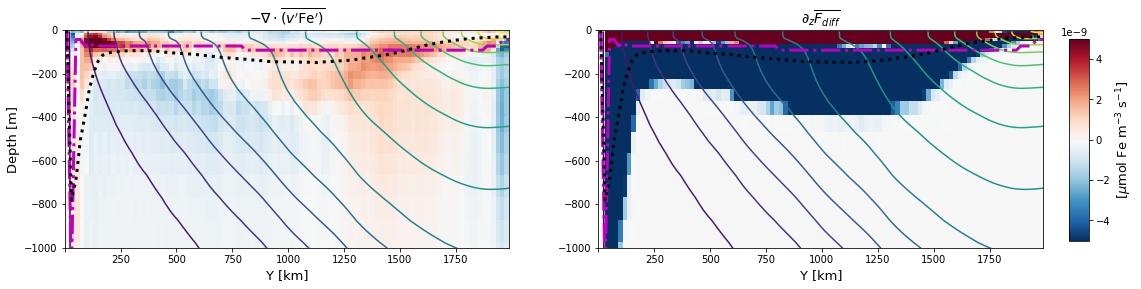

In [54]:
Tlevs = np.arange(-1.,8.5,.5) + 0.
yst = 2
dny = 4
dnz = 2
yy, zz = np.meshgrid(ds.YC.data[yst::dny], ds.Z.data[::dnz])
N = wpFep_b.data[::dnz,yst::dny].shape

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(T_clim.YC, T_clim.Z, advpp_b*1e3, 
                   vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
                   rasterized=True)
# ax1.plot(MLDb.YC, -MLDb, 'k', lw=2)
ax1.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax1.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax1.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
#            , cmap='RdBu_r')
# ax1.quiver(yy, zz, (vpFep_b/Feb)[::dnz,yst::dny], 
#           np.ones((N[0],N[1]))*(wpFep_b/Feb)[::dnz,yst::dny], 
#           pivot='mid', angles='xy')
#           , scale_units='xy', scale=1.)
ax1.set_xticks(np.arange(0.,2e6,2.5e5))
ax1.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax1.set_xlabel('Y [km]', fontsize=13)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_ylim([-1000,0.])
ax1.set_title(r"$-\nabla\cdot\overline{(v'{\tt Fe'})}$", fontsize=14)

ax2.pcolormesh(T_clim.YC, T_clim.Z, dff_z_clim*1e3, 
              vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
              rasterized=True)
# ax2.plot(MLDb.YC, -MLDb, 'k', lw=2)
ax2.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax2.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax2.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
ax2.set_xticks(np.arange(0.,2e6,2.5e5))
ax2.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax2.set_xlabel('Y [km]', fontsize=13)
# ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_ylim([-1000,0.])
ax2.set_title(r"$\partial_z \overline{F_{diff}}$", fontsize=14)

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-3}$ s$^{-1}$]", fontsize=13)
plt.savefig(op.join(pdir,'Figures/eddyfluxvector_20km-top1000m.pdf'))

# Iron budget

In [ ]:
month = np.tile(np.repeat(range(12),30),dy)
seas = np.tile(np.repeat(range(4),90),dy)
ds['month'] = ('time', month)
ds['seas'] = ('time', seas)
ds_mon = ds.groupby('month').mean(['time','XC','XG'])
ds_sea = ds.groupby('seas').mean(['time','XC','XG'])
ds_anom = ds.groupby('month') - ds_mon

In [ ]:
with ProgressBar():
    Fem = ds_mon.TRAC03.load()
    vFem = ds_mon.VTRAC03.load()
    wFem = ds_mon.WTRAC03.load()
    advVm = ds_mon.ADVyTr03.load()
    advWm = ds_mon.ADVrTr03.load()
#     kppm = ds_mon.KPPgTr03.load()
    dfim = ds_mon.DFrITr03.load()
    bgcm = ds_mon.FeTbgc.load()

[########################################] | 100% Completed | 10.5s
[########################################] | 100% Completed | 10.5s
[######################                  ] | 55% Completed |  6.1s

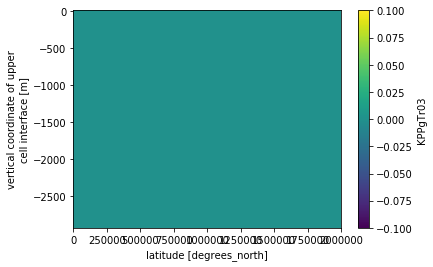

In [85]:
kppm.mean(['month']).plot()

In [51]:
with ProgressBar():
    wp = dsmom_anom.WVEL.load()
    phip = dsmom_anom.PHIHYD.load()

[########################################] | 100% Completed | 10.1s
[########################################] | 100% Completed |  8.5s


In [37]:
with ProgressBar():
    vm = ds_mon.VVEL.load()
    wm = ds_mon.WVEL.load()

[########################################] | 100% Completed | 26.0s
[########################################] | 100% Completed | 10.1s
[########################################] | 100% Completed |  2min  2.0s
[########################################] | 100% Completed | 10.3s


In [52]:
grid = Grid(dsmom, periodic=['X'])
bp = grid.diff(phip,'Z',boundary='fill')/grid.diff(phip.Z,'Z',boundary='fill')
wpbp = (wp*bp).sel(YC=slice(6e5,14e5))
wpbp.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wpbp_d = wpbp.groupby('day').mean(['time','XC','YC']).compute()
wpbp_d

<xarray.DataArray (day: 24, Zl: 40)>
array([[ 2.788786e-10,  4.266956e-10,  7.639623e-10, ...,  2.457944e-10,
         1.215203e-10,  6.344764e-11],
       [-1.503132e-09,  4.475044e-10,  7.980078e-10, ...,  2.491738e-10,
         1.254941e-10,  6.913533e-11],
       [-6.397572e-10,  3.822634e-10,  6.865167e-10, ...,  2.128197e-10,
         1.111881e-10,  6.611944e-11],
       ...,
       [ 2.310348e-10,  7.536752e-10,  1.409253e-09, ...,  2.497328e-10,
         1.263635e-10,  6.571547e-11],
       [-1.276190e-09,  6.352265e-10,  1.180078e-09, ...,  2.155931e-10,
         1.115350e-10,  6.068331e-11],
       [-1.397121e-09,  5.216975e-10,  9.427207e-10, ...,  2.271432e-10,
         1.110491e-10,  5.874595e-11]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [154]:
print(ds.ADVyTr03.attrs)
print(ds.ADVrTr03.attrs)
print(ds.VTRAC03.attrs)
print(ds.WTRAC03.attrs)

OrderedDict([('standard_name', 'ADVyTr03'), ('long_name', 'Meridional Advective Flux of FeT'), ('units', 'mM/m^3 .m^3/s'), ('mate', 'ADVxTr03')])
OrderedDict([('standard_name', 'ADVrTr03'), ('long_name', 'Vertical   Advective Flux of FeT'), ('units', 'mM/m^3 .m^3/s')])
OrderedDict([('standard_name', 'VTRAC03'), ('long_name', 'Merid Mass-Weighted Transp of FeT'), ('units', 'mM/m^3 .m/s'), ('mate', 'UTRAC03')])
OrderedDict([('standard_name', 'WTRAC03'), ('long_name', 'Vert  Mass-Weighted Transp of FeT'), ('units', 'mM/m^3 .m/s')])


In [95]:
advzm = grid.diff(advWm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advym = grid.diff(advVm, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advm = -(-advzm + advym).compute()

difz = grid.diff(dfim, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
# kpp = grid.diff(kppm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
ss = bgcm

advm

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[-0.000000e+00, -7.181190e-12, ..., -2.841921e-13, -1.586224e-12],
        [-0.000000e+00, -7.275443e-12, ..., -8.208018e-14, -2.921352e-12],
        ...,
        [-0.000000e+00, -4.815264e-14, ...,  3.277077e-13,  3.128263e-14],
        [-0.000000e+00, -2.740082e-13, ...,  4.521110e-13,  8.160150e-14]],

       [[-0.000000e+00, -6.676433e-12, ...,  1.004217e-12,  1.428997e-14],
        [-0.000000e+00, -5.929844e-12, ..., -2.082148e-13, -7.142799e-13],
        ...,
        [-0.000000e+00, -1.167497e-14, ...,  3.176396e-13,  4.231330e-14],
        [-0.000000e+00, -2.203181e-13, ...,  4.461026e-13,  8.777072e-14]],

       ...,

       [[-0.000000e+00, -6.200639e-12, ..., -5.245922e-12, -6.006529e-12],
        [-0.000000e+00, -6.538081e-12, ..., -1.014597e-12, -5.551306e-12],
        ...,
        [-0.000000e+00, -3.789728e-14, ...,  1.832992e-13,  1.112240e-14],
        [-0.000000e+00, -2.516600e-13, ...,  2.799055e-13,  5.454036e-14

In [96]:
dsS = open_mdsdataset(op.join(bdir,'20km_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                      grid_dir=op.join(pdir,'20km_grid'),
                      iters=range(ts,te,1440), prefix=['FeTsnap_30d'], 
                      delta_t=dt
                     )
dsS

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 50, XG: 50, YC: 100, YG: 100, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 120)
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * XG       (XG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * YG       (YG) >f4 0.0 20000.0 40000.0 60000.0 80000.0 100000.0 120000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dxG      (YG, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    dyG      (YC, XG) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask

In [97]:
fe_xbar = dsS.TRAC03.mean('XC')
print(dsS.TRAC03.attrs)
tempo = (-fe_xbar+fe_xbar.roll(time=-1).data) / (3e1*864e2)
# tempo = fe_xbar.diff('time') / (3e1*864e2)
tempo.coords['month'] = ('time',np.tile(range(12),dy))

# febar_vol = grid.cumsum(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
#                         'Z', to='outer', boundary='fill'
#                        )[:,:,nys:nyn].sum(['YC'])
# dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)

dFe = tempo.groupby('month').mean(['time']).compute()
dFe.attrs['unit'] = 'mmol Fe m-3 s-1'

dFe

OrderedDict([('standard_name', 'TRAC03'), ('long_name', 'FeT concentration'), ('units', 'mM/m^3')])


<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -2.733947e-12, ..., -2.970451e-11, -3.206280e-11],
        [ 0.000000e+00, -2.734380e-12, ..., -2.150923e-11, -2.870782e-11],
        ...,
        [ 0.000000e+00, -4.571503e-14, ...,  1.954044e-13,  2.333359e-13],
        [ 0.000000e+00,  2.010545e-14, ...,  1.578894e-13,  1.960388e-13]],

       [[ 0.000000e+00,  2.610383e-13, ..., -4.810421e-12, -6.323998e-12],
        [ 0.000000e+00,  2.601238e-13, ...,  3.500992e-12,  5.049854e-12],
        ...,
        [ 0.000000e+00, -1.428805e-14, ...,  9.330180e-14,  1.077560e-13],
        [ 0.000000e+00,  2.833244e-14, ...,  6.511870e-14,  7.394753e-14]],

       ...,

       [[ 0.000000e+00, -5.808601e-12, ...,  1.023541e-11,  6.183924e-12],
        [ 0.000000e+00, -5.795269e-12, ...,  9.319758e-12,  9.617869e-12],
        ...,
        [ 0.000000e+00, -1.954740e-14, ..., -1.481252e-13, -7.178047e-14],
        [ 0.000000e+00,  7.389026e-14, ..., -1.523291e-13, -5.487060e-14

In [98]:
res = (dFe - (advm + difz + ss)).compute()
res

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -4.207867e-13, ...,  1.082889e-11,  1.146929e-11],
        [ 0.000000e+00,  1.951564e-17, ...,  2.012662e-11,  2.093023e-11],
        ...,
        [ 0.000000e+00, -4.231777e-18, ..., -1.494542e-13,  1.793257e-13],
        [ 0.000000e+00, -3.926845e-18, ..., -6.324064e-13, -3.094976e-13]],

       [[ 0.000000e+00,  4.713180e-13, ...,  2.517475e-11,  3.241855e-11],
        [ 0.000000e+00,  2.032879e-18, ...,  2.625373e-11,  3.242780e-11],
        ...,
        [ 0.000000e+00, -8.283982e-19, ..., -2.392018e-13,  4.591805e-14],
        [ 0.000000e+00, -2.886688e-18, ..., -6.984979e-13, -4.111546e-13]],

       ...,

       [[ 0.000000e+00, -6.007872e-13, ...,  8.518020e-12, -5.177976e-14],
        [ 0.000000e+00, -3.469447e-18, ...,  2.291984e-11,  1.755338e-11],
        ...,
        [ 0.000000e+00,  4.828088e-18, ..., -3.567169e-13, -1.150857e-13],
        [ 0.000000e+00, -5.841139e-18, ..., -8.011068e-13, -5.618798e-13

In [99]:
nys,nyn = (600,1400)
adv_mean = advm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advz_mean = advzm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advy_mean = advym.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
# kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

In [ ]:
# colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,16))
# for j in range(4):
#     for i in range(3):
#         axes[j,i].plot(dFe_mean[j*3+i]*1e3, dFe_mean.Z, 'k',
#                        lw=3, alpha=0.7, label=r'$\overline{Fe}_t$')
#         axes[j,i].plot(adv_mean[j*3+i]*1e3, adv_mean.Z, 'r',
#                        lw=3, alpha=0.7, label=r'$\overline{F}_{\mathbf{v} Fe}$')
#         axes[j,i].plot(advz_mean[j*3+i]*1e3, adv_mean.Z, 'r',
#                        ls='--', label=r'$\overline{F}_{w Fe}$')
#         axes[j,i].plot(-advy_mean[j*3+i]*1e3, adv_mean.Z, 'r',
#                        ls=':', label=r'$\overline{F}_{v Fe}$')
#         axes[j,i].plot(dif_mean[j*3+i]*1e3, dif_mean.Z, 'g',
#                        lw=3, alpha=0.7, label=r"$\overline{F}_{diff}$")
# #         axes[j,i].plot(kpp_mean[j*3+i]*1e3, kpp_mean.Z, 'c',
# #                        lw=3, label=r"$\overline{F}_{KPP}$")
#         axes[j,i].plot(dot_mean[j*3+i]*1e3, dot_mean.Z, 'orange',
#                        lw=3, label=r"$\overline{\dot{Fe}}$")
#         axes[j,i].plot(res_mean[j*3+i]*1e3, res_mean.Z, '--', color='grey',
#                        lw=3, alpha=0.7, label=r"Residual")
# #         ax2 = axes[j,i].twiny()
# #         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
# #                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
# #                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
# #                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
# #                       )
# # #         ax2.set_xlim([.1,1e1])
# #         ax2.set_xscale('log')
# #         ax2.xaxis.label.set_color(p2.get_color())

#         tkw = dict(size=4, width=1.5)
# #         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
#         axes[j,i].tick_params(axis='both', **tkw)
        
#         axes[j,i].set_title(months[j*3+i],fontsize=14,y=1.02)
#         axes[j,i].set_xlim([-3e-8,3e-8])
#         axes[j,i].set_ylim([-4e2,0.])
# #         axes[j,i].grid(True)

# axes[0,0].legend(loc='lower left', fontsize=12)
# fig.subplots_adjust(left=0.1)
# # cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# # cbar = fig.colorbar(cax, cax=cbar_ax)
# # cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

# fig.text(0.01, 0.5, 'Depth [m]', 
#          va='center', rotation='vertical', fontsize=17)
# fig.text(0.38, 0.009, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
#          va='center', rotation='horizontal', fontsize=17)

# plt.tight_layout(pad=2.5)
# # plt.grid(True)
# plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-at-eachdepth_20km.pdf'))

In [ ]:
# colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
# for j in range(2):
#     for i in range(3):
#         nn = j*3+i+7
#         if nn > 11:
#             nn -= 12
#         print(nn)
#         axes[j,i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
#                        lw=3, alpha=0.7, label=r'$\overline{Fe}_t$')
#         axes[j,i].plot(adv_mean[nn]*1e3, adv_mean.Z, 'r',
#                        lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} Fe}$')
#         axes[j,i].plot(advz_mean[nn]*1e3, adv_mean.Z, 'r',
#                        ls='--', label=r'$\partial_z \overline{F}_{w Fe}$')
#         axes[j,i].plot(-advy_mean[nn]*1e3, adv_mean.Z, 'r',
#                        ls=':', label=r'$\partial_y \overline{F}_{v Fe}$')
#         axes[j,i].plot(dif_mean[nn]*1e3, dif_mean.Z, 'g',
#                        lw=3, alpha=0.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                        lw=3, label=r"$\partial_z \overline{F}_{KPP}$")
#         axes[j,i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'orange',
#                        lw=3, label=r"$\overline{\dot{Fe}}$")
#         axes[j,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                        lw=3, alpha=0.7, label=r"Residual")
# #         ax2 = axes[j,i].twiny()
# #         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
# #                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
# #                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
# #                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
# #                       )
# # #         ax2.set_xlim([.1,1e1])
# #         ax2.set_xscale('log')
# #         ax2.xaxis.label.set_color(p2.get_color())

#         tkw = dict(size=4, width=1.5)
# #         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
#         axes[j,i].tick_params(axis='both', **tkw)
        
#         axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
#         axes[1,2].legend(loc='lower left', fontsize=12)
#         axes[j,i].set_xlim([-3e-8,3e-8])
#         axes[j,i].set_ylim([-4e2,0.])
#         axes[j,i].grid(True)

# fig.subplots_adjust(left=0.1)
# # cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# # cbar = fig.colorbar(cax, cax=cbar_ax)
# # cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

# fig.text(0.01, 0.5, 'Depth [m]', 
#          va='center', rotation='vertical', fontsize=14)
# fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
#          va='center', rotation='horizontal', fontsize=14)

# plt.tight_layout(pad=2.5)
# # plt.grid(True)
# plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_20km.pdf'))

7
8
9
10
11
0


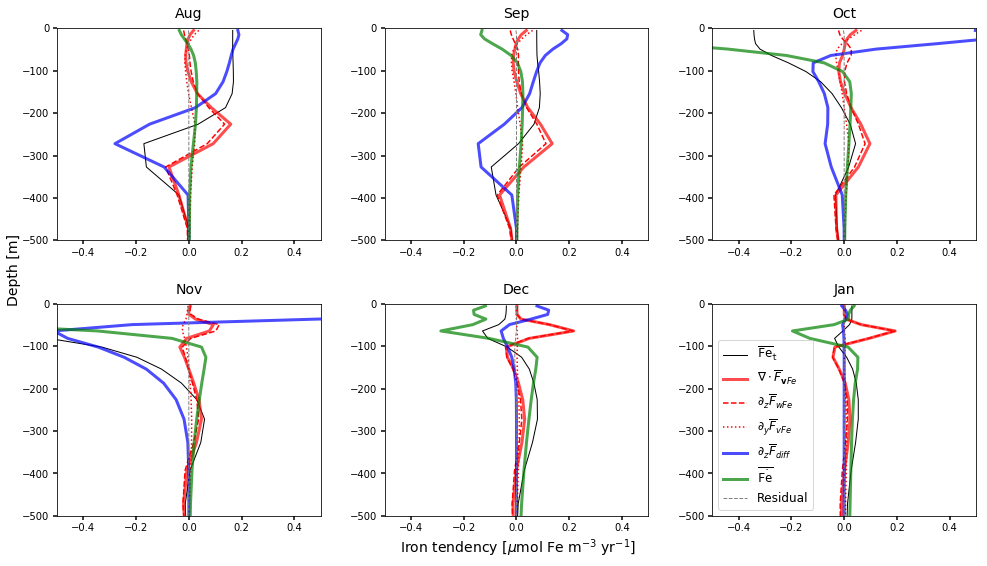

In [101]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
for j in range(2):
    for i in range(3):
        nn = j*3+i+7
        if nn > 11:
            nn -= 12
        print(nn)
        axes[j,i].plot(dFe_mean[nn]*1e3*(360*86400), dFe_mean.Z, 'k',
                       lw=1, alpha=1., label=r'$\overline{\tt Fe}_t$')
        axes[j,i].plot(adv_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} Fe}$')
        axes[j,i].plot(advz_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls='--', label=r'$\partial_z \overline{F}_{w Fe}$')
        axes[j,i].plot(-advy_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls=':', label=r'$\partial_y \overline{F}_{v Fe}$')
        axes[j,i].plot(dif_mean[nn]*1e3*(360*86400), dif_mean.Z, 'b',
                       lw=3, alpha=.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3*(360*86400), kpp_mean.Z, 'orange',
#                        lw=1, label=r"$\partial_z \overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[nn]*1e3*(360*86400), dot_mean.Z, 'g',
                       lw=3, alpha=.7, label=r"$\overline{\dot{\tt Fe}}$")
        axes[j,i].plot(res_mean[nn]*1e3*(360*86400), res_mean.Z, '--', color='grey',
                       lw=1, alpha=1., label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
        axes[j,i].set_xlim([-5e-1,5e-1])
        axes[j,i].set_ylim([-5e2,0.])
#         axes[j,i].grid(True)

axes[1,2].legend(loc='lower left', fontsize=12)
fig.subplots_adjust(left=0.12)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_20km.pdf'))

In [110]:
fe_intrp = grid.interp(Fem, 'Y', boundary='fill')
vmfem = (vm * fe_intrp).compute()
fe_intrp = grid.interp(Fem, 'Z', boundary='fill')
wmfem = (wm * fe_intrp).compute()

[########################################] | 100% Completed | 19.3s
[########################################] | 100% Completed | 15.2s


In [124]:
dwfe = advWm/ds.rA.mean('XC') - grid.interp(wFem,'Z',boundary='fill')
dvfe = advVm/(ds.drF*ds.dxG).mean('XC') - vFem

dwfe_m = grid.diff(dwfe,'Z',boundary='fill') * ds.drF**-1
dvfe_m = grid.diff(dvfe*ds.dxG.mean('XC'),
                    'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
print(dwfe_m, dvfe_m)
dadv = -(-dwfe_m + dvfe_m)
dadv

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 100)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...


<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...

In [125]:
advmfem = grid.diff(vmfem*ds.dxG.mean('XC'),
                   'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
adwmfem = grid.diff(wmfem,'Z',boundary='fill') * ds.drF**-1

print(advmfem, adwmfem)

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00, -3.801499e-12, ..., -6.027758e-14,  1.459213e-13],
        [ 0.000000e+00, -3.421471e-12, ..., -7.147448e-14,  3.567653e-14],
        ...,
        [ 0.000000e+00, -1.473204e-13, ..., -1.556830e-13,  8.953100e-14],
        [ 0.000000e+00,  2.419540e-12, ...,  7.615599e-13, -1.202502e-12]],

       [[ 0.000000e+00, -5.036700e-12, ...,  1.626365e-14,  1.608837e-13],
        [ 0.000000e+00, -4.219763e-12, ..., -6.221646e-14, -1.825434e-14],
        ...,
        [ 0.000000e+00, -1.434079e-13, ..., -9.358223e-14,  5.845479e-14],
        [ 0.000000e+00,  2.484996e-12, ...,  7.079376e-13, -1

In [126]:
vpfep_m = vFem - vmfem
advpfep_m = grid.diff(vpfep_m*ds.dxG.mean('XC'),
                     'Y',boundary='fill') * ds.rA.mean('XC')**-1
wpfep_m = grid.interp(wFem,'Z',boundary='fill') - wmfem
adwpfep_m = grid.diff(wpfep_m,'Z',boundary='fill') * ds.drF**-1

print(advpfep_m, adwpfep_m)

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 40, 99)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ... <xarray.DataArray (month: 12, Z: 40, YC: 100)>
array([[[ 0.000000e+00,  4.293400e-13, ...,  3.607738e-14, -1.628824e-14],
        [ 0.000000e+00, -3.398480e-12, ...,  3.262530e-14,  2.569888e-13],
        ...,
        [ 0.000000e+00, -1.503975e-14, ...,  2.982997e-14, -2.400170e-14],
        [ 0.000000e+00, -9.712646e-14, ..., -7.966760e-14,  3.448455e-14]],

       [[ 0.000000e+00,  1.209719e-12, ...,  5.611763e-15,  1.519258e-14],
        [ 0.000000e+00, -2.792486e-12, ..., -1.508216e-14,  1.970948e-13],
        ...,
        [ 0.000000e+00, -1.910311e-14, ...,  2.558229e-14, -1.603363e-14],
        [ 0.000000e+00, -9.340129e-14, ..., -5.643591e-14,  2

In [127]:
advmm = -(-adwmfem + advmfem)
advpp_m = -(-adwpfep_m + advpfep_m)

In [128]:
res = dFe - ((advmm+advpp_m) + difz + kpp + ss + dadv)
res

<xarray.DataArray (month: 12, Z: 40, YC: 100)>
dask.array<shape=(12, 40, 100), dtype=float32, chunksize=(12, 39, 99)>
Coordinates:
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [129]:
nys,nyn = (600,1400)
with ProgressBar():
    advbb_mean = advmm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_mean = advpp_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meanz = adwpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meany = -advpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dadv_mean = dadv.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


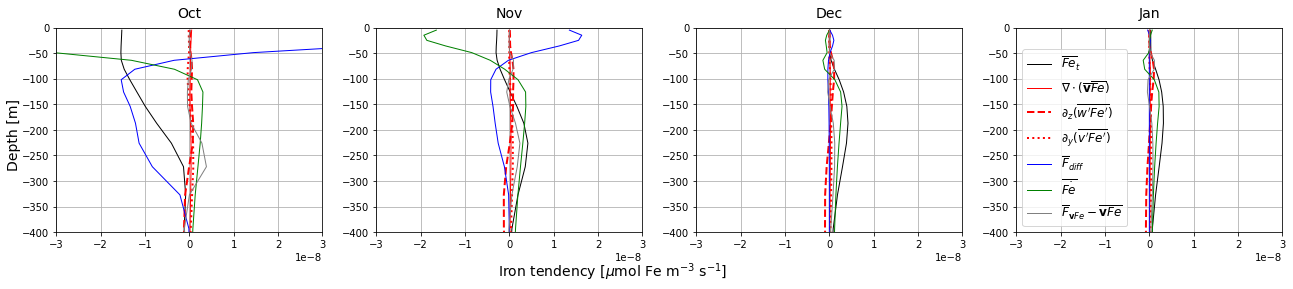

In [206]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

tkw = dict(size=4, width=1.5)
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(18,4))
for i in range(4):
    if i < 3:
        nn = 9+i
        axes[i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
                    lw=1, label=r'$\overline{Fe}_t$')
        axes[i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
                    lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
        axes[i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
                    lw=2, label=r"$\partial_z (\overline{w' Fe'})$")
        axes[i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
                    lw=2, label=r"$\partial_y (\overline{v' Fe'})$")
        axes[i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
                    lw=1, label=r"$\overline{F}_{diff}$")
#             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                            lw=1, label=r"$\overline{F}_{KPP}$")
        axes[i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
                    lw=1, label=r"$\overline{\dot{Fe}}$")
        axes[i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
                    lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
#         axes[i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                       lw=1, label=r"Residual")
        axes[i].tick_params(axis='both')
        axes[i].set_title(months[nn],fontsize=14,y=1.02)
        axes[i].set_xlim([-3e-8, 3e-8])
        axes[i].set_ylim([-4e2, 0])
        axes[i].grid(True)
    else:
        nn = 0
        axes[i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
                    lw=1, label=r'$\overline{Fe}_t$')
        axes[i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
                    lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
        axes[i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
                    lw=2, label=r"$\partial_z (\overline{w' Fe'})$")
        axes[i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
                    lw=2, label=r"$\partial_y (\overline{v' Fe'})$")
        axes[i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
                    lw=1, label=r"$\overline{F}_{diff}$")
#             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                            lw=1, label=r"$\overline{F}_{KPP}$")
        axes[i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
                    lw=1, label=r"$\overline{\dot{Fe}}$")
        axes[i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
                    lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
#         axes[i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                        lw=1, label=r"Residual")
        axes[i].tick_params(axis='both')
        axes[i].set_title(months[nn],fontsize=14,y=1.02)
        axes[i].set_xlim([-3e-8, 3e-8])
        axes[i].set_ylim([-4e2, 0])
        axes[i].grid(True)
        
    axes[3].legend(loc='lower left', fontsize=12)
# for j in range(4):
#     for i in range(3):
#         nn = j*3+i
#         if j==0:
#             axes[1,i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
#                            lw=1, label=r'$\overline{Fe}_t$')
#             axes[1,i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
#                            lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
#             axes[1,i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
#                            lw=3, label=r"$\partial_z (\overline{w' Fe'})$")
#             axes[1,i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
#                            lw=3, label=r"$\partial_y (\overline{v' Fe'})$")
#             axes[1,i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
#                            lw=1, label=r"$\overline{F}_{diff}$")
# #             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
# #                            lw=1, label=r"$\overline{F}_{KPP}$")
#             axes[1,i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
#                            lw=1, label=r"$\overline{\dot{Fe}}$")
#             axes[1,i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
#                            lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
# #             axes[1,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
# #                            lw=1, label=r"Residual")
#             axes[1,i].tick_params(axis='both')
#             axes[1,i].set_title(months[nn],fontsize=14,y=1.02)
#             axes[1,i].set_xlim([-3e-8, 3e-8])
#             axes[1,i].set_ylim([-3e2, 0])
#             axes[1,i].grid(True)
#         elif j==3:
#             axes[0,i].plot(dFe_mean[nn]*1e3, dFe_mean.Z, 'k',
#                            lw=1, label=r'$\overline{Fe}_t$')
#             axes[0,i].plot(advbb_mean[nn]*1e3, advbb_mean.Z, 'r',
#                            lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}} \overline{Fe})$')
#             axes[0,i].plot(advpp_meanz[nn]*1e3, advpp_mean.Z, 'r--',
#                            lw=3, label=r"$\partial_z (\overline{w' Fe'})$")
#             axes[0,i].plot(advpp_meany[nn]*1e3, advpp_mean.Z, 'r:',
#                            lw=3, label=r"$\partial_y (\overline{v' Fe'})$")
#             axes[0,i].plot((dif_mean+kpp_mean)[nn]*1e3, dif_mean.Z, 'b',
#                            lw=1, label=r"$\overline{F}_{diff}$")
# #             axes[0,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
# #                            lw=1, label=r"$\overline{F}_{KPP}$")
#             axes[0,i].plot(dot_mean[nn]*1e3, dot_mean.Z, 'g',
#                            lw=1, label=r"$\overline{\dot{Fe}}$")
#             axes[0,i].plot(dadv_mean[nn]*1e3, dadv_mean.Z, color='grey',
#                            lw=1, label=r"$\overline{F}_{\mathbf{v}Fe} - \overline{\mathbf{v}Fe}$")
# #             axes[0,i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
# #                            lw=1, label=r"Residual")
#             axes[0,i].tick_params(axis='both')
#             axes[0,i].set_title(months[nn],fontsize=14,y=1.02)
#             axes[0,i].set_xlim([-3e-8, 3e-8])
#             axes[0,i].set_ylim([-3e2, 0])
#             axes[0,i].grid(True)
# #         ax2 = axes[j,i].twiny()
# #         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
# #                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
# #                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
# #                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
# #                       )
# # #         ax2.set_xlim([.1,1e1])
# #         ax2.set_xscale('log')
# #         ax2.xaxis.label.set_color(p2.get_color())
#         axes[1,0].legend(loc='lower left', fontsize=12)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)

# fig.subplots_adjust(left=0.2)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.001, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.38, 0.025, 'Iron tendency [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

# fig.subplots_adjust(bottom=0.4)
plt.tight_layout(pad=1.6)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-at-eachdepth_withPPterms_20km.pdf'))

In [54]:
u1max = 1/1.05  # [1/d]
u2max = 1/1.3 # [1/d]
Kp1 = 0.018
Kp2 = 0.010
Ki1 = 1.05e-3
Ki2 = 5.9e-3
Kn1 = 0.035
Kn2 = 0.015
r_FeP = 1e-3
r_SiP = 16
r_NP = 16
kSi1 = Kn1 * r_SiP
kN1 = Kn1 * r_NP
kN2 = Kn2 * r_NP
kFe1 = Kn1 * r_FeP
kFe2 = Kn2 * r_FeP

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


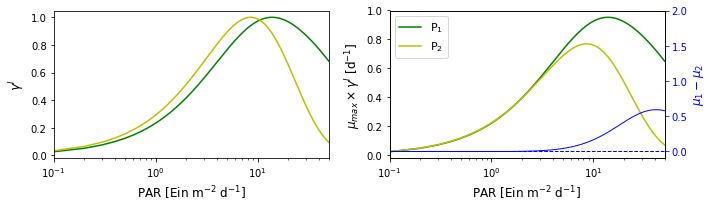

In [55]:
I = np.arange(.1,50.1,0.1)*1e6/86400
Fo = Kp1/(Kp1+Ki1)*np.exp(Ki1/Kp1*np.log(Ki1/(Kp1+Ki1)))
gammaI1_test = Fo**-1 * (1.-np.exp(-Kp1*I)) * np.exp(-Ki1*I)
Fo = Kp2/(Kp2+Ki2)*np.exp(Ki2/Kp2*np.log(Ki2/(Kp2+Ki2)))
gammaI2_test = Fo**-1 * (1.-np.exp(-Kp2*I)) * np.exp(-Ki2*I)

fig, (ax1,ax3) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
ax4 = ax3.twinx()
ax1.plot(I*1e-6*86400, gammaI1_test, 'g')
ax1.plot(I*1e-6*86400, gammaI2_test, 'y')
ax3.plot(I*1e-6*86400, u1max*gammaI1_test, 'g', label=r'P$_1$')
ax3.plot(I*1e-6*86400, u2max*gammaI2_test, 'y', label=r'P$_2$')
ax4.plot(I*1e-6*86400, u1max*gammaI1_test-u2max*gammaI2_test, 'b', lw=1)
ax4.plot(I*1e-6*86400, np.zeros(len(I)), 'b--', lw=1)
ax1.set_xlim([.1,50.])
ax3.set_xlim([.1,50.])
ax4.set_ylim([-.1,2.])
ax1.set_ylabel(r"$\gamma^I$", fontsize=12)
ax3.set_ylabel(r"$\mu_{max}\times\gamma^I$ [d$^{-1}$]", fontsize=12)
ax4.set_ylabel(r"$\mu_1-\mu_2$", fontsize=12, color='b')
ax1.set_xlabel(r"PAR [Ein m$^{-2}$ d$^{-1}$]", fontsize=12)
ax3.set_xlabel(r"PAR [Ein m$^{-2}$ d$^{-1}$]", fontsize=12)
ax1.set_xscale('log')
ax3.set_xscale('log')
# ax4.set_xscale('log')
ax4.tick_params('y', colors='blue')
ax3.legend(loc='upper left', fontsize=11)
plt.savefig(op.join(pdir,'Figures/gammaI.pdf'))

In [56]:
dtype = '>f8'
shape = (12,100,50)
# par_north = 3e1+2e1*np.cos(np.pi/6*np.arange(1,13))
# par_ideal = par_north[:,np.newaxis] + np.linspace(-10,0,num=100)[np.newaxis,:]
PAR = np.fromfile(op.join(bdir,'PAR_noncos_linear_020km.bin'), 
                 dtype=dtype)
PAR.shape = shape
PAR = xr.DataArray(PAR, dims=['month','YC','XC'],
                  coords={'month':range(1,13),'YC':ds.YC.data,'XC':ds.XC.data}
                  )
I = PAR*1e6/86400
Fo_s = Kp2/(Kp2+Ki2)*np.exp(Ki2/Kp2
                           * np.log(Ki2/(Kp2+Ki2))
                           )
gammaI2 = Fo_s**-1 * (1.-np.exp(-Kp2*I)) * np.exp(-Ki2*I)
Fo_b = Kp1/(Kp1+Ki1)*np.exp(Ki1/Kp1
                           * np.log(Ki1/(Kp1+Ki1))
                           )
gammaI1 = Fo_b**-1 * (1.-np.exp(-Kp1*I)) * np.exp(-Ki1*I)
gammaI1

<xarray.DataArray (month: 12, YC: 100, XC: 50)>
array([[[0.814193, 0.814193, ..., 0.814193, 0.814193],
        [0.813303, 0.813303, ..., 0.813303, 0.813303],
        ...,
        [0.731028, 0.731028, ..., 0.731028, 0.731028],
        [0.730222, 0.730222, ..., 0.730222, 0.730222]],

       [[0.89953 , 0.89953 , ..., 0.89953 , 0.89953 ],
        [0.898598, 0.898598, ..., 0.898598, 0.898598],
        ...,
        [0.809694, 0.809694, ..., 0.809694, 0.809694],
        [0.808809, 0.808809, ..., 0.808809, 0.808809]],

       ...,

       [[0.839817, 0.839817, ..., 0.839817, 0.839817],
        [0.838906, 0.838906, ..., 0.838906, 0.838906],
        ...,
        [0.754317, 0.754317, ..., 0.754317, 0.754317],
        [0.753486, 0.753486, ..., 0.753486, 0.753486]],

       [[0.789485, 0.789485, ..., 0.789485, 0.789485],
        [0.788619, 0.788619, ..., 0.788619, 0.788619],
        ...,
        [0.708691, 0.708691, ..., 0.708691, 0.708691],
        [0.707909, 0.707909, ..., 0.707909, 0.707909]]])

In [57]:
N2_Fe = ds.TRAC03/(ds.TRAC03+kFe2)
N1_Fe = ds.TRAC03/(ds.TRAC03+kFe1)
N2_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe

<xarray.DataArray 'TRAC03' (time: 4320, Z: 40, YC: 100, XC: 50)>
dask.array<shape=(4320, 40, 100, 50), dtype=float32, chunksize=(1, 40, 100, 50)>
Coordinates:
  * XC       (XC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * YC       (YC) >f4 10000.0 30000.0 50000.0 70000.0 90000.0 110000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    Depth    (YC, XC) >f4 dask.array<shape=(100, 50), chunksize=(100, 50)>
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 100, 50), chunksize=(40, 100, 50)>
    iter     (time) int64 dask.array<shape=(4320,), chunksize=(1,)>
  * time     (time) float64 6.221e+09 6.221e+09 6.221e+09 6.221e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [58]:
with ProgressBar():
    gamFe2_day = N2_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
    gamFe1_day = N1_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
gamFe1_day

[########################################] | 100% Completed | 13.3s
[########################################] | 100% Completed | 12.0s


<xarray.DataArray 'TRAC03' (days: 360)>
array([0.161427, 0.162458, 0.163535, ..., 0.1578  , 0.158623, 0.159485],
      dtype=float32)
Coordinates:
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


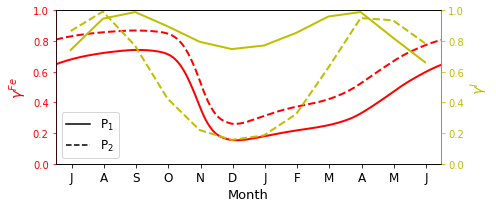

In [59]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']

fig, ax = plt.subplots(figsize=(7,3))
fig.set_tight_layout(True)
ax2 = ax.twinx()

im, = ax.plot(range(0,360), gamFe1_day.roll(days=-180), 'r', lw=2)
ax.plot(range(0,360), gamFe2_day.roll(days=-180), 'r--', lw=2)
im2, = ax2.plot(np.linspace(14,344,12), gammaI1.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y', lw=2)
ax2.plot(np.linspace(14,344,12), gammaI2.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y--', lw=2)

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.asarray(month),-6), fontsize=12)
ax.set_xlim([0,359])
ax.set_ylim([.0,1.0])
ax2.set_ylim([.0,1.0])
ax.spines["left"].set_edgecolor(im.get_color())
ax2.spines["right"].set_edgecolor(im2.get_color())
ax.tick_params(axis='y', colors=im.get_color())
ax2.tick_params(axis='y', colors=im2.get_color())

ax.set_xlabel(r"Month", fontsize=13)
ax.set_ylabel(r'$\gamma^{Fe}$', color='r', fontsize=14)
ax2.set_ylabel(r'$\gamma^{I}$', color='y', fontsize=14)
linestyles = ['-', "--"]
dummy_lines = [ax.plot([],[], c="black", ls = linestyles[0])[0]]
dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[1])[0])
legend = ax.legend([dummy_lines[i] for i in [0,1]], ["P$_1$", "P$_2$"], loc=3, fontsize=12)
plt.savefig(op.join(pdir,'Figures/Gamma_Fe-and-PAR_20km.pdf'))